#Pune Flood Sensor Data
In this notebook we will analyse Pune flood sensor data. 

### Load required modules and install pyIUDX module.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates
import folium
from folium import plugins

In [2]:
# install the latest version of pyIUDX module from github
pip install git+https://github.com/iudx/pyIUDX

  Cloning https://github.com/iudx/pyIUDX to /tmp/pip-req-build-5i3yvtyb
  Running command git clone -q https://github.com/iudx/pyIUDX /tmp/pip-req-build-5i3yvtyb
  Created wheel for pyIUDX: filename=pyIUDX-0.0.1-cp36-none-any.whl size=22775 sha256=dc66a52699ee75e1797ccece3509dadf4a1e45487a55dcca08e0e26a816b49f0
  Stored in directory: /tmp/pip-ephem-wheel-cache-rb0xbycs/wheels/9a/47/49/4628dcd08582cacb7599b922e10d77572044b4c49fe076e0e8
Successfully built pyIUDX


In [0]:
from pyIUDX.cat import cat
# Specify the catalogue server details.
# initialize a catalogue class
cat = cat.Catalogue("https://pudx.catalogue.iudx.org.in/catalogue/v1")

In [4]:
geo1 = {"circle": {"lat": 18.539107, "lon": 73.853987, "radius": 30000}}
attributes = {"tags": ["flood"]}
filters = ["id"]

all_flood_ItemsByID = cat.getManyResourceItems(attributes, filters, geo=geo1)
print(all_flood_ItemsByID)
print("Number of items = ", len(all_flood_ItemsByID))

[{'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/flood-sensor/Hingne Khurd SR NO 18'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/flood-sensor/Katraj Mumbai Highway'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/flood-sensor/Prayega City'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/flood-sensor/Uttam Nagar(Indiranagar)'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/flood-sensor/Sangam Cross Road'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/flood-sensor/Wakad'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/flood-sensor/Opp. Dattanagar Baner Balawadi Cross'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/flood-sensor/Pashan Bopodi Nala'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/p

In [5]:
# Import the item class from pyIUDX.rs
from pyIUDX.rs import item
m = folium.Map(location=[18.5204,73.8567],zoom_start=12)
plugins.ScrollZoomToggler().add_to(m)
flood_sensors = item.Items("https://pudx.catalogue.iudx.org.in/catalogue/v1", all_flood_ItemsByID)
print(flood_sensors[0].geoProperties)
for sensor in flood_sensors:
  sensor_id = sensor.id  
  print("Sensor location = ", sensor.location.coordinates)
  folium.Marker([sensor.location.coordinates[1], sensor.location.coordinates[0] ], popup=sensor_id).add_to(m)    
m

['location']
Sensor location =  [73.815, 18.466743]
Sensor location =  [73.831801, 18.478267]
Sensor location =  [73.82616, 18.576302]
Sensor location =  [73.783856, 18.5625691]
Sensor location =  [73.7733941, 18.4585]
Sensor location =  [73.8094, 18.474711]
Sensor location =  [73.7911981, 18.5362241]
Sensor location =  [73.75912, 18.5871341]
Sensor location =  [73.798638, 18.5471501]
Sensor location =  [73.8329631, 18.573808]
Sensor location =  [73.8364779, 18.5047619]
Sensor location =  [73.82772, 18.488375]
Sensor location =  [73.8115129, 18.56794]
Sensor location =  [73.802805, 18.483614]
Sensor location =  [73.8261239, 18.498396]
Sensor location =  [73.8638231, 18.4920141]
Sensor location =  [73.844455, 18.515439]
Sensor location =  [73.860397, 18.529627]
Sensor location =  [73.855672, 18.5325731]
Sensor location =  [73.8739201, 18.558761]
Sensor location =  [73.84946, 18.520586]
Sensor location =  [73.863861, 18.5545509]
Sensor location =  [73.8430339, 18.5135281]
Sensor location

In [6]:
print(flood_sensors[0].quantitativeProperties)

['ALERT', 'CUR_LEVEL', 'DANGER', 'M_DISTANCE', 'REF_LEVEL']


Let's choose dates where there was flooding in the riverbed. These are -
August 5th and
September 25th.

In [7]:
flood_sensors.during("2019-09-23T00:00:00.000+05:30", "2019-09-27T00:00:00.000+05:30")

<Items [<pyIUDX.rs.item.Item object at 0x7f7856773f98>, <pyIUDX.rs.item.Item object at 0x7f785434d668>, <pyIUDX.rs.item.Item object at 0x7f78545d1e48>, <pyIUDX.rs.item.Item object at 0x7f7854557e48>, <pyIUDX.rs.item.Item object at 0x7f7856773a90>, <pyIUDX.rs.item.Item object at 0x7f785458f4a8>, <pyIUDX.rs.item.Item object at 0x7f785464e748>, <pyIUDX.rs.item.Item object at 0x7f785456a588>, <pyIUDX.rs.item.Item object at 0x7f785457a048>, <pyIUDX.rs.item.Item object at 0x7f7854466f98>, <pyIUDX.rs.item.Item object at 0x7f7854553208>, <pyIUDX.rs.item.Item object at 0x7f785430ec18>, <pyIUDX.rs.item.Item object at 0x7f785441dcc0>, <pyIUDX.rs.item.Item object at 0x7f78542aba90>, <pyIUDX.rs.item.Item object at 0x7f7856773240>, <pyIUDX.rs.item.Item object at 0x7f785426f860>, <pyIUDX.rs.item.Item object at 0x7f78545f3dd8>, <pyIUDX.rs.item.Item object at 0x7f78542d5390>, <pyIUDX.rs.item.Item object at 0x7f78542d2128>, <pyIUDX.rs.item.Item object at 0x7f785423ac88>, <pyIUDX.rs.item.Item object at 0

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


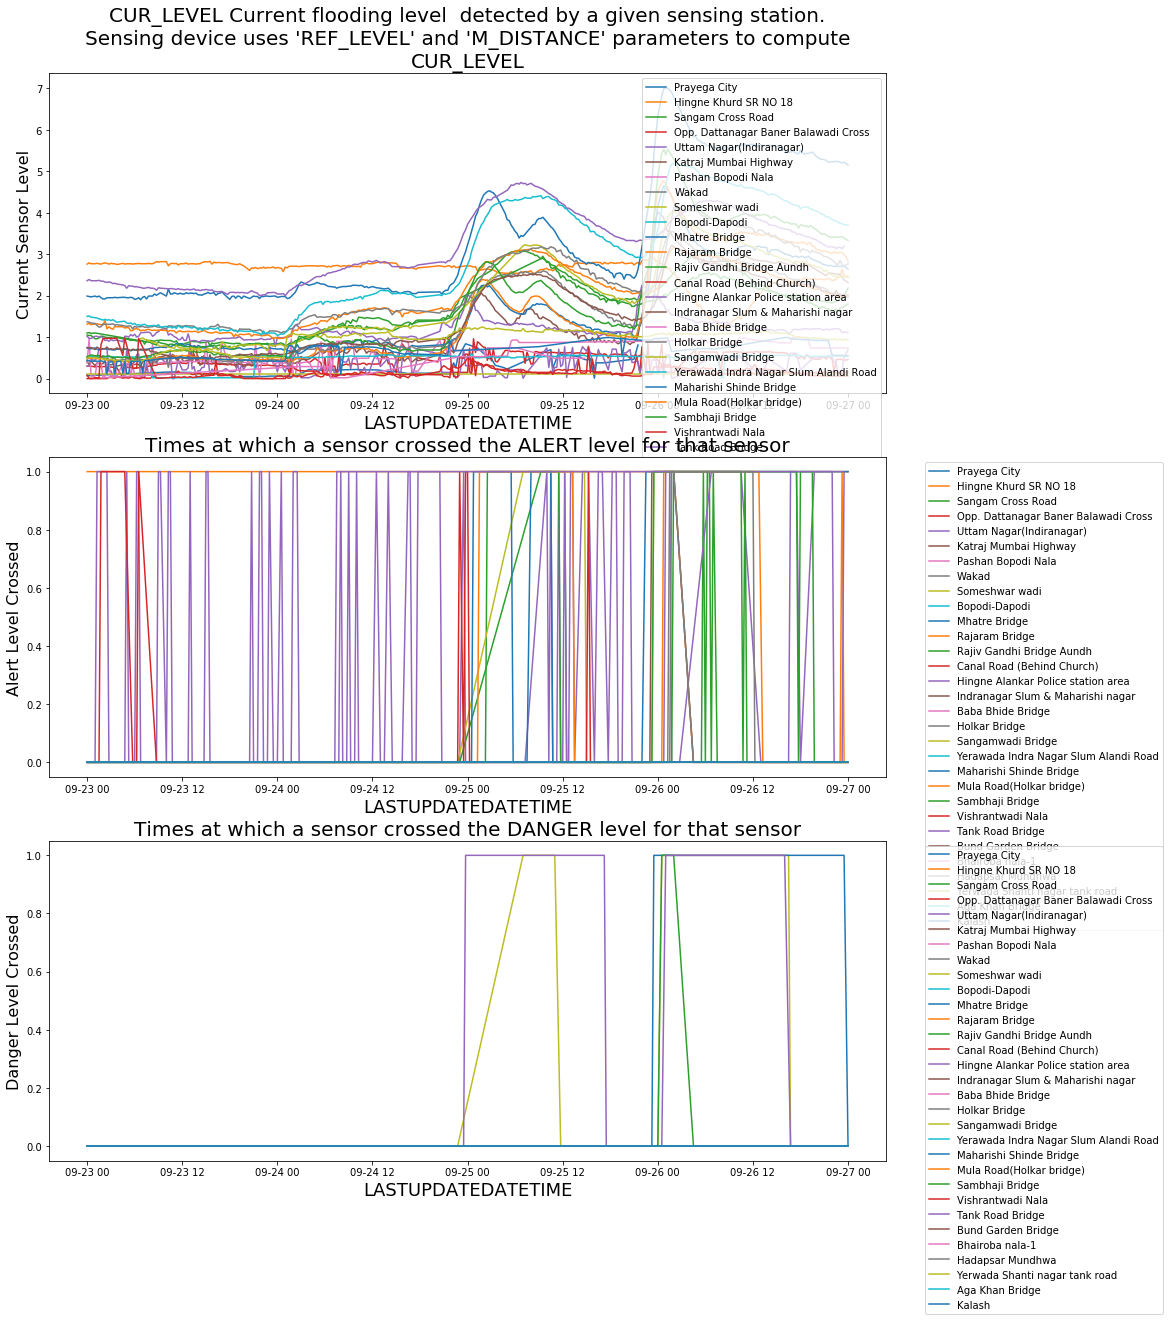

In [8]:
import matplotlib.pyplot as plt
from textwrap import wrap

fig, axis = plt.subplots(3,1,figsize=(15,20))
plt.subplot(3,1,1)
plt.title("\n".join(wrap(flood_sensors[1].CUR_LEVEL.name + "\n" + flood_sensors[1].CUR_LEVEL.describes)), fontsize=20)
for sensor in flood_sensors:
  plt.plot(sensor.CUR_LEVEL.value[:,0], sensor.CUR_LEVEL.value[:,1], label=sensor.id.split("/")[-1])
plt.legend()
plt.xlabel(flood_sensors[1].timeProperty, fontsize=18)
plt.ylabel("Current Sensor Level", fontsize=16)

plt.subplot(3,1,2)
plt.title("\n".join(wrap("Times at which a sensor crossed the ALERT level for that sensor")), fontsize=20)
for sensor in flood_sensors:
  crossed_alert = np.greater_equal(sensor.CUR_LEVEL.value[:,1], sensor.ALERT.value[:,1])
  plt.plot(sensor.ALERT.value[:,0], crossed_alert, label=sensor.id.split("/")[-1])
plt.legend()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel(flood_sensors[1].timeProperty, fontsize=18)
plt.ylabel("Alert Level Crossed", fontsize=16)

plt.subplot(3,1,3)
plt.title("\n".join(wrap("Times at which a sensor crossed the DANGER level for that sensor")), fontsize=20)
for sensor in flood_sensors:
  crossed_danger = np.greater_equal(sensor.CUR_LEVEL.value[:,1], sensor.DANGER.value[:,1])
  plt.plot(sensor.DANGER.value[:,0], crossed_danger, label=sensor.id.split("/")[-1])
plt.legend()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel(flood_sensors[1].timeProperty, fontsize=18)
plt.ylabel("Danger Level Crossed", fontsize=16)
plt.show()

Similarly, for August 5th

In [9]:
flood_sensors.during("2019-08-03T00:00:00.000+05:30", "2019-08-07T00:00:00.000+05:30")

<Items [<pyIUDX.rs.item.Item object at 0x7f7853601160>, <pyIUDX.rs.item.Item object at 0x7f7851c80fd0>, <pyIUDX.rs.item.Item object at 0x7f7853601128>, <pyIUDX.rs.item.Item object at 0x7f785441d5c0>, <pyIUDX.rs.item.Item object at 0x7f78536010f0>, <pyIUDX.rs.item.Item object at 0x7f7853601ac8>, <pyIUDX.rs.item.Item object at 0x7f78536010b8>, <pyIUDX.rs.item.Item object at 0x7f7851ca50f0>, <pyIUDX.rs.item.Item object at 0x7f785441d1d0>, <pyIUDX.rs.item.Item object at 0x7f7851da99e8>, <pyIUDX.rs.item.Item object at 0x7f78536012b0>, <pyIUDX.rs.item.Item object at 0x7f7851baa630>, <pyIUDX.rs.item.Item object at 0x7f78536011d0>, <pyIUDX.rs.item.Item object at 0x7f7851c2c5c0>, <pyIUDX.rs.item.Item object at 0x7f7853601080>, <pyIUDX.rs.item.Item object at 0x7f7851c1f898>, <pyIUDX.rs.item.Item object at 0x7f78536019b0>, <pyIUDX.rs.item.Item object at 0x7f7851b0c438>, <pyIUDX.rs.item.Item object at 0x7f7851cb3198>, <pyIUDX.rs.item.Item object at 0x7f7851c43518>, <pyIUDX.rs.item.Item object at 0

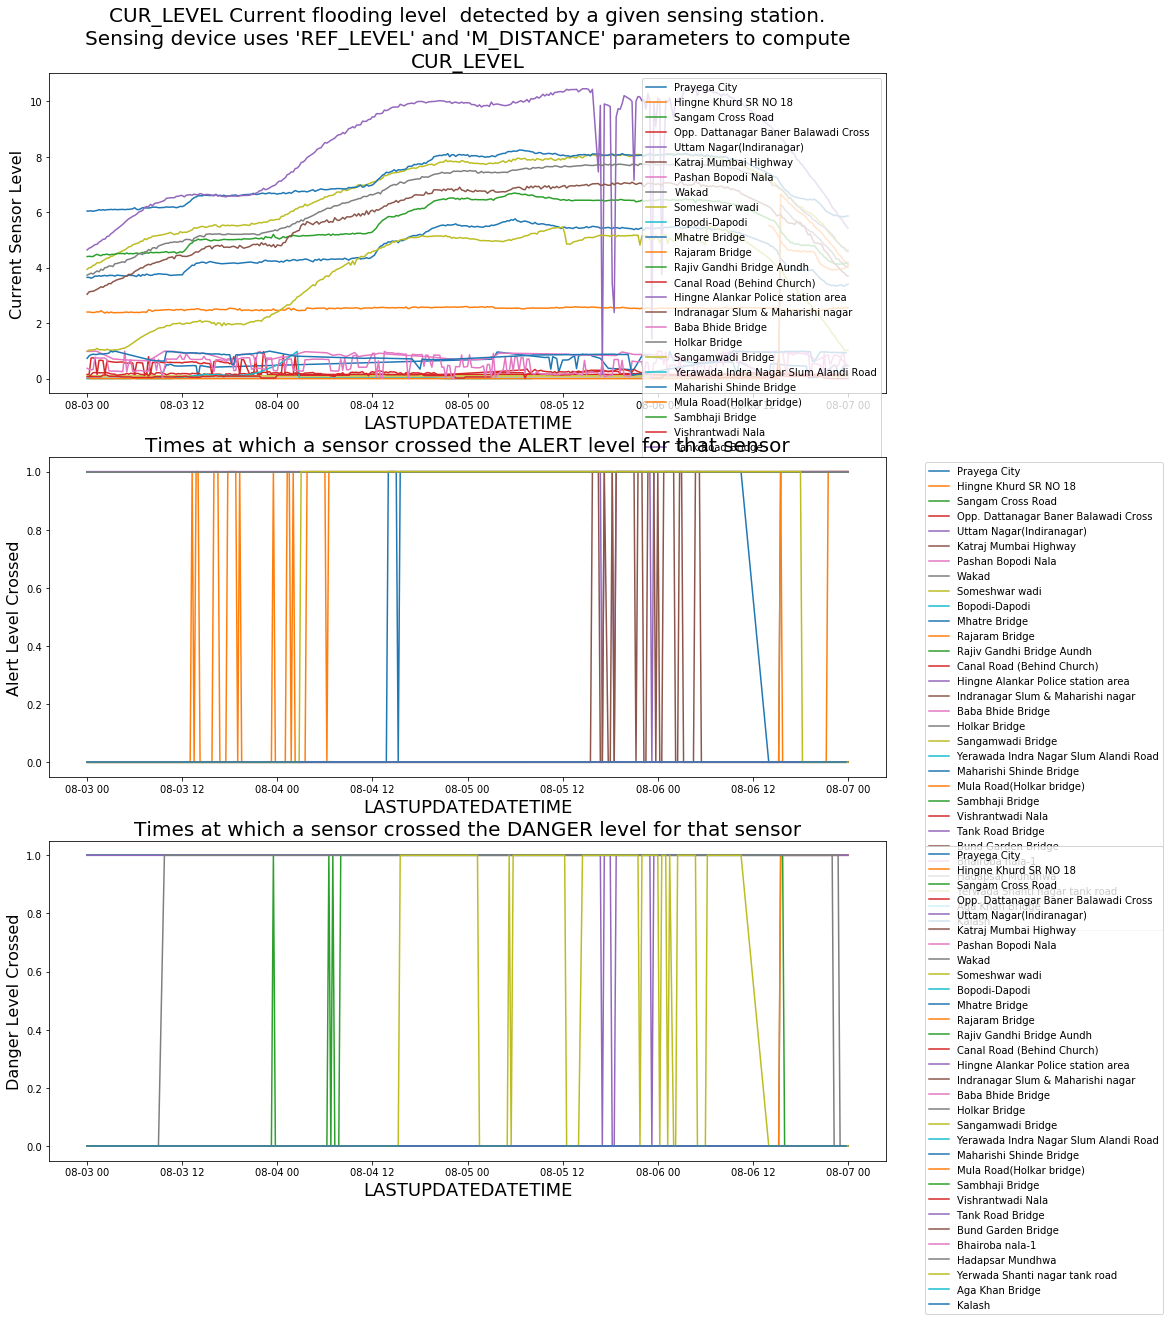

In [10]:
import matplotlib.pyplot as plt
from textwrap import wrap

fig, axis = plt.subplots(3,1,figsize=(15,20))
plt.subplot(3,1,1)
plt.title("\n".join(wrap(flood_sensors[1].CUR_LEVEL.name + "\n" + flood_sensors[1].CUR_LEVEL.describes)), fontsize=20)
for sensor in flood_sensors:
  plt.plot(sensor.CUR_LEVEL.value[:,0], sensor.CUR_LEVEL.value[:,1], label=sensor.id.split("/")[-1])
plt.legend()
plt.xlabel(flood_sensors[1].timeProperty, fontsize=18)
plt.ylabel("Current Sensor Level", fontsize=16)

plt.subplot(3,1,2)
plt.title("\n".join(wrap("Times at which a sensor crossed the ALERT level for that sensor")), fontsize=20)
for sensor in flood_sensors:
  crossed_alert = np.greater_equal(sensor.CUR_LEVEL.value[:,1], sensor.ALERT.value[:,1])
  plt.plot(sensor.ALERT.value[:,0], crossed_alert, label=sensor.id.split("/")[-1])
plt.legend()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel(flood_sensors[1].timeProperty, fontsize=18)
plt.ylabel("Alert Level Crossed", fontsize=16)

plt.subplot(3,1,3)
plt.title("\n".join(wrap("Times at which a sensor crossed the DANGER level for that sensor")), fontsize=20)
for sensor in flood_sensors:
  crossed_danger = np.greater_equal(sensor.CUR_LEVEL.value[:,1], sensor.DANGER.value[:,1])
  plt.plot(sensor.DANGER.value[:,0], crossed_danger, label=sensor.id.split("/")[-1])
plt.legend()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel(flood_sensors[1].timeProperty, fontsize=18)
plt.ylabel("Danger Level Crossed", fontsize=16)
plt.show()

## Downloading larger datasets
Because of the large size of the data availabe, we have restricted PUDX "during" queries to only work when the time is less than one day. If data for a longer period is required, you will be needing the download API.
We will however need the resourceServerGroup id instead of the id for this. To find this, you can go to pudx.catalogue.iudx.org.in and search for flood with tags. Once the item is shown in the list view, you can click "details" and obtain the group id.
The resourceServerGroup id for Flood is "urn:iudx-catalogue-pune:pudx-resource-server/flood-sensor"

This will now give us a Google Drive link which we can use to download files based on weeks of the year. 

In [11]:
from pyIUDX.rs import rs

rs = rs.ResourceServer("https://pudx.resourceserver.iudx.org.in/resource-server/pscdcl/v1")

groupId = "urn:iudx-catalogue-pune:pudx-resource-server/flood-sensor"

data = rs.downloadData(groupId)
data

{'download_URL': 'https://drive.google.com/open?id=11sXpD3o0hcYxcCNzFMafQGkKLi4C4IP1',
 'resourceServerGroup': 'urn:iudx-catalogue-pune:pudx-resource-server/flood-sensor'}

On opening that download_URL, you will find different files corresponding to different weeks of the year for Flood. You can then use python pyDrive module to download that file.

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from pydrive.files import GoogleDriveFile
from google.colab import auth
from oauth2client.client import GoogleCredentials

Authenticate with Google Drive. This will ask you to follow a link and allow access. You need to have a gmail account. Once you have accessed the link 

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
files = GoogleDriveFile(auth=gauth)

In [14]:
folder_id = data["download_URL"].split("=")[-1]
file_list = drive.ListFile({'q': "'%s' in parents and trashed=false" % folder_id}).GetList()

for f in file_list:
  print(f["title"])

flood-sensor-Week_26.json
flood-sensor-Week_37.json
flood-sensor-Week_27.json
flood-sensor-Week_24.json
flood-sensor-Week_21.json
flood-sensor-Week_31.json
flood-sensor-Week_18.json
flood-sensor-Week_34.json
flood-sensor-Week_39.json
flood-sensor-Week_19.json
flood-sensor-Week_28.json
flood-sensor-Week_25.json
flood-sensor-Week_14.json
flood-sensor-Week_17.json
flood-sensor-Week_30.json
flood-sensor-Week_32.json
flood-sensor-Week_22.json
flood-sensor-Week_23.json
flood-sensor-Week_38.json
flood-sensor-Week_16.json
flood-sensor-Week_35.json
flood-sensor-Week_33.json
flood-sensor-Week_15.json
flood-sensor-Week_20.json
flood-sensor-Week_29.json
flood-sensor-Week_36.json
flood-sensor-Week_40.json


Let's get data for one such week.

In [0]:
fl = file_list[0]
fl.GetContentFile(fl["title"])

In [16]:
!ls

adc.json  flood-sensor-Week_26.json  sample_data


In [17]:
import json 

with open(fl["title"], "r") as f:
  df_json = json.load(f)
""" The first data point in the downloaded data """
df_json[0:1]

[{'ALERT': '0.0',
  'CUR_LEVEL': '0.2',
  'DANGER': '0.0',
  'LASTUPDATEDATETIME': '2019-06-30T18:15:00.000000+05:30',
  'NAME': 'Kalash',
  'SITE_STATUS': 'Active',
  'STATION_ID': 'FWR015',
  'STATUS': 'Danger',
  '__resource-group': 'flood-sensor',
  '__resource-id': 'pudx-resource-server/flood-sensor/Kalash'}]

Doing you analysis this way might be simpler that using the Item() module as was shown previously, but it hides away some of the meta information that you would need, for example location. This can still be overcome by querying for the location of the "NAME" field in the data packet as shown below.
Refer to - getOneresourceItem in https://pyiudx.readthedocs.io/en/latest/pyIUDX.cat.html

In [18]:
attributes = {"NAME": [df_json[0]["NAME"]]}
item = cat.getManyResourceItems(attributes)[0]
item

{'@context': ['https://raw.githubusercontent.com/iudx/iudx-ld/master/data_models/environment/floodSensor/env_flood_climoPune_0.json'],
 'NAME': {'type': 'Property', 'value': 'Kalash'},
 'STATION_ID': {'type': 'Property', 'value': 'FWR015'},
 'createdAt': {'type': 'TimeProperty',
  'value': 'Fri Nov 01 05:56:43 UTC 2019'},
 'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/flood-sensor/Kalash',
 'itemDescription': 'Describes a Flood sensing station',
 'itemStatus': {'type': 'Property', 'value': 'active'},
 'itemType': {'type': 'Property', 'value': 'resourceItem'},
 'location': {'type': 'GeoProperty',
  'value': {'geometry': {'coordinates': [73.8727111, 18.581797],
    'type': 'Point'}}},
 'onboardedBy': 'Technical consultant at rbccps.org',
 'provider': {'type': 'Relationship',
  'value': 'urn:iudx-catalogue-pune:pscdcl'},
 'refBaseSchema': {'type': 'Relationship',
  'value': 'https://raw.githubusercontent.com/iudx/iudx-ld/master/base_schemas/v0.0.0/resourc

Obtaining location for this is now simple -

In [19]:
item["location"]["value"]["geometry"]["coordinates"]

[73.8727111, 18.581797]

Bear in mind, the location is a geo-json and the latitude and longitude are interchanged. This is because usually coordinates are mentioned as [x, y] where x axis is usually the longitude and lattitude. However, most of the mapping utitilities consider [y, x] or [latitude, longitude]. You will have to interchange the latitude and longitude in this case.

### Grouping in pandas
The downloaded data can be grouped by "NAME" field and help you in generating a dataset. You will need Pandas for this.

In [20]:
import pandas as pd

df_flood = pd.DataFrame(df_json)
df_flood.head(3)

,STATUS,__resource-group,CUR_LEVEL,NAME,LASTUPDATEDATETIME,DANGER,SITE_STATUS,STATION_ID,ALERT,__resource-id
0,Danger,flood-sensor,0.2,Kalash,2019-06-30T18:15:00.000000+05:30,0.0,Active,FWR015,0.0,pudx-resource-server/flood-sensor/Kalash
1,Normal,flood-sensor,0.64,Yerwada Shanti nagar tank road,2019-06-30T18:15:00.000000+05:30,5.0,Active,FWR065,3.0,pudx-resource-server/flood-sensor/Yerwada Shan...
2,Normal,flood-sensor,0.02,Bhairoba nala-1,2019-06-30T18:15:00.000000+05:30,2.0,Active,FWR013,1.0,pudx-resource-server/flood-sensor/Bhairoba nala-1


Now we can group by "NAME" field -

In [21]:
df_grouped = df_flood.groupby("NAME")
print("Getting data frame for " + df_json[0]["NAME"])
some_flood_sensor = df_grouped.get_group(df_json[0]["NAME"])
some_flood_sensor.head(3)


Getting data frame for Kalash


,STATUS,__resource-group,CUR_LEVEL,NAME,LASTUPDATEDATETIME,DANGER,SITE_STATUS,STATION_ID,ALERT,__resource-id
0,Danger,flood-sensor,0.2,Kalash,2019-06-30T18:15:00.000000+05:30,0.0,Active,FWR015,0.0,pudx-resource-server/flood-sensor/Kalash
22,Danger,flood-sensor,0.2,Kalash,2019-06-30T18:00:00.000000+05:30,0.0,Active,FWR015,0.0,pudx-resource-server/flood-sensor/Kalash
48,Danger,flood-sensor,0.22,Kalash,2019-06-30T15:15:00.000000+05:30,0.0,Active,FWR015,0.0,pudx-resource-server/flood-sensor/Kalash
